In [ ]:
# 

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
# print(mushroom.metadata) 
  
# variable information 
df=mushroom.variables
df

,name,role,type,demographic,description,units,missing_values
0,poisonous,Target,Categorical,None,None,None,no
1,cap-shape,Feature,Categorical,None,"bell=b,conical=c,convex=x,flat=f, knobbed=k,su...",None,no
2,cap-surface,Feature,Categorical,None,"fibrous=f,grooves=g,scaly=y,smooth=s",None,no
3,cap-color,Feature,Binary,None,"brown=n,buff=b,cinnamon=c,gray=g,green=r, pink...",None,no
4,bruises,Feature,Categorical,None,"bruises=t,no=f",None,no
5,odor,Feature,Categorical,None,"almond=a,anise=l,creosote=c,fishy=y,foul=f, mu...",None,no
6,gill-attachment,Feature,Categorical,None,"attached=a,descending=d,free=f,notched=n",None,no
7,gill-spacing,Feature,Categorical,None,"close=c,crowded=w,distant=d",None,no
8,gill-size,Feature,Categorical,None,"broad=b,narrow=n",None,no
9,gill-color,Feature,Categorical,None,"black=k,brown=n,buff=b,chocolate=h,gray=g, gre...",None,no


In [4]:
df.isnull().sum()

name               0
role               0
type               0
demographic       23
description        1
units             23
missing_values     0
dtype: int64

In [5]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [6]:
y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [7]:
y['poisonous'].unique()

array(['p', 'e'], dtype=object)

In [8]:
mapping = {"e": 1,
           "p": 0}

y['poisonous'] = y['poisonous'].map(mapping)

print(y.head())

   poisonous
0          0
1          1
2          1
3          0
4          1


C:\Users\Dell\AppData\Local\Temp\ipykernel_18664\2864334747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['poisonous'] = y['poisonous'].map(mapping)


In [9]:
for column in X.columns:
    print(column, X[column].unique())

cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' nan]
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [10]:
# mapping = {"p": 1, "f": 1}

# X['odor'] = X['odor'].map(mapping).fillna(0)
# X['odor']

In [11]:
label_encoder = LabelEncoder()
encoded_data = X.apply(label_encoder.fit_transform)

In [12]:
X = encoded_data.copy()
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [13]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluating the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_pred_test))


Training Accuracy: 0.9576857978150485
Testing Accuracy: 0.9532307692307692

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3134
           1       0.96      0.96      0.96      3365

    accuracy                           0.96      6499
   macro avg       0.96      0.96      0.96      6499
weighted avg       0.96      0.96      0.96      6499


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       782
           1       0.96      0.95      0.95       843

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
y_pred_train_df=pd.DataFrame(y_pred_train)
y_pred_train_df

,0
0,0
1,0
2,0
3,1
4,1
...,...
6494,0
6495,1
6496,1
6497,0


In [15]:
y_train

,poisonous
7873,0
6515,0
6141,0
2764,1
438,1
...,...
5226,0
5390,1
860,1
7603,0


In [16]:
y_train.reset_index(drop=True, inplace=True)
y_train

,poisonous
0,0
1,0
2,0
3,1
4,1
...,...
6494,0
6495,1
6496,1
6497,0


In [17]:
y_train_vs_y_pred_train = pd.concat([y_train,y_pred_train_df], axis=1)
y_train_vs_y_pred_train.rename(columns={0: 'Predicted'}, inplace=True)
y_train_vs_y_pred_train

,poisonous,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
6494,0,0
6495,1,1
6496,1,1
6497,0,0


In [18]:
mismatched_values = y_train_vs_y_pred_train[y_train_vs_y_pred_train['poisonous'] != y_train_vs_y_pred_train['Predicted']]


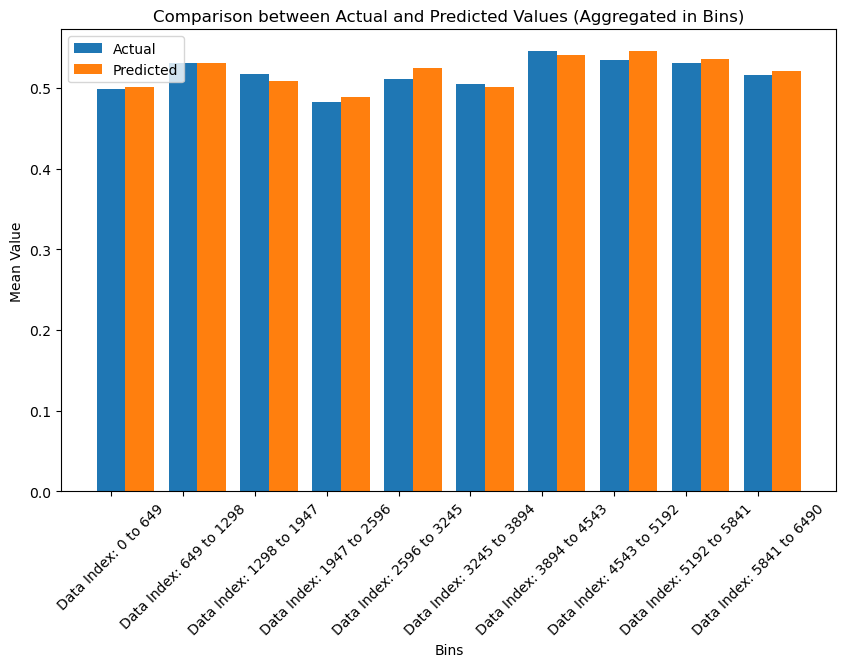

In [24]:
# Define the number of bins (ranges)
num_bins = 10

# Calculate the number of samples per bin
samples_per_bin = len(y_train_vs_y_pred_train) // num_bins

# Create empty lists to store aggregated values
actual_values = []
predicted_values = []
bin_labels = []

# Iterate over the bins
for i in range(num_bins):
    # Calculate the start and end index of the current bin
    start_index = i * samples_per_bin
    end_index = (i + 1) * samples_per_bin
    
    # Get the values within the current bin range
    bin_values = y_train_vs_y_pred_train.iloc[start_index:end_index]
    
    # Aggregate the values (mean, sum, etc.)
    actual_mean = bin_values.iloc[:, 0].mean()  # Assuming 'poisonous' is the first column
    predicted_mean = bin_values.iloc[:, 1].mean()  # Assuming '0' is the second column
    
    # Append the aggregated values to the lists
    actual_values.append(actual_mean)
    predicted_values.append(predicted_mean)
    
    # You can either assign actual values to each bin or mention them in the legend
    # Assigning actual values to bin labels
    bin_label = f'Data Index: {start_index} to {end_index}'
    bin_labels.append(bin_label)

# Plot the aggregated values
plt.figure(figsize=(10, 6))
plt.bar(range(num_bins), actual_values, width=0.4, align='center', label='Actual')
plt.bar([x + 0.4 for x in range(num_bins)], predicted_values, width=0.4, align='center', label='Predicted')
plt.xlabel('Bins')
plt.ylabel('Mean Value')
plt.title('Comparison between Actual and Predicted Values (Aggregated in Bins)')
plt.xticks(range(num_bins), bin_labels, rotation=45)  # Rotate x-axis labels by 45 degrees
plt.legend()
plt.show()

In [20]:
y_train_vs_y_pred_train

,poisonous,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
6494,0,0
6495,1,1
6496,1,1
6497,0,0
